In [186]:
import pandas as pd

In [187]:
df=pd.read_csv('googleplaystore.csv')

In [188]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [190]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [191]:
df=df.dropna()

In [192]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [193]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [194]:
df.shape

(9360, 13)

In [195]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 

In [196]:
df=df[df['Size'] != 'Varies with device']

In [197]:
def convert_size(Size):
    if 'M' in Size:
        value= float(Size.replace('M', '').strip())
        return value*1000
    elif 'k' in Size:
        value= float(Size.replace('k', '').strip())
        return value
    else:
        return None
  


In [198]:
df['Size']=df['Size'].apply(convert_size)

In [199]:
df.Size

0        19000.0
1        14000.0
2         8700.0
3        25000.0
4         2800.0
          ...   
10833      619.0
10834     2600.0
10836    53000.0
10837     3600.0
10840    19000.0
Name: Size, Length: 7723, dtype: float64

In [200]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [201]:
df['Reviews']=df['Reviews'].astype('int')

In [202]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [203]:
df['Installs']=df['Installs'].str.replace('+','').str.replace(',','').astype(int)

/tmp/ipykernel_72/2692625777.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs']=df['Installs'].str.replace('+','').str.replace(',','').astype(int)


In [204]:
df.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10833        1000
10834         500
10836        5000
10837         100
10840    10000000
Name: Installs, Length: 7723, dtype: int64

In [205]:
df['Price']=df['Price'].str.replace('$','').astype(float)

/tmp/ipykernel_72/2752835945.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price']=df['Price'].str.replace('$','').astype(float)


In [206]:
df.Price

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10833    0.0
10834    0.0
10836    0.0
10837    0.0
10840    0.0
Name: Price, Length: 7723, dtype: float64

In [207]:
print(df.dtypes)

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


Sanity checks:

In [208]:
min_rating=1.0
max_rating=5.0
df = df[((df['Rating'] >= 1.0 )& (df['Rating'] <= 5.0 ))]


In [209]:
df.Rating

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10833    4.8
10834    4.0
10836    4.5
10837    5.0
10840    4.5
Name: Rating, Length: 7723, dtype: float64

Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [210]:
df=df[(df['Reviews'] <= df['Installs'])]

In [211]:
df[['Reviews','Installs']]

,Reviews,Installs
0,159,10000
1,967,500000
2,87510,5000000
3,215644,50000000
4,967,100000
...,...,...
10833,44,1000
10834,7,500
10836,38,5000
10837,4,100


For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [212]:
df=df.loc[ ~ ((df['Type']=='Free') & (df['Price'] > 0))]

In [213]:
df[['Type', 'Price']]

,Type,Price
0,Free,0.0
1,Free,0.0
2,Free,0.0
3,Free,0.0
4,Free,0.0
...,...,...
10833,Free,0.0
10834,Free,0.0
10836,Free,0.0
10837,Free,0.0


Boxplot for Price

In [214]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Boxplot for Price')

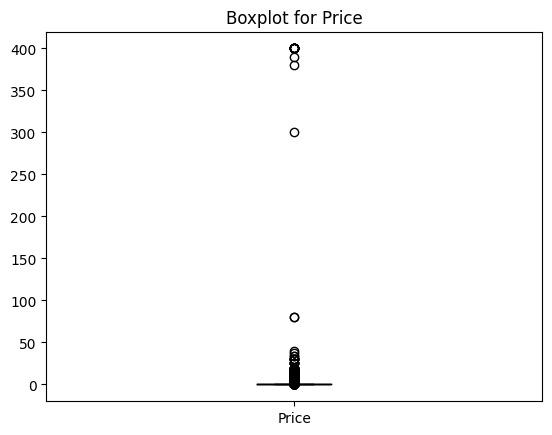

In [215]:
df.boxplot(column=['Price'],grid=False,color='black')
plt.title('Boxplot for Price',color='black')
# Most of the app prices lies below $100
# outliers are there. Above 250$

In [216]:
df['Price'].describe()

count    7717.000000
mean        1.128725
std        17.414784
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

Boxplot for Reviews

Text(0.5, 1.0, 'Boxplot for Reviews')

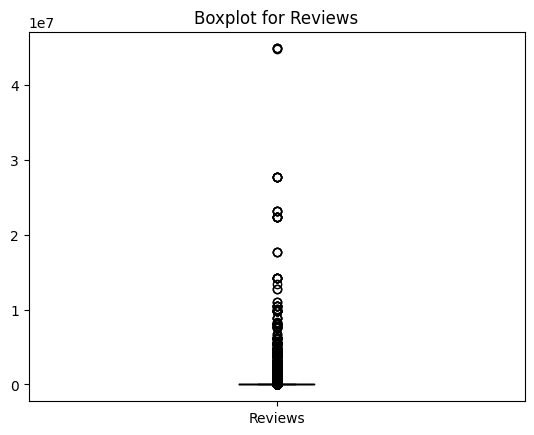

In [217]:
df.boxplot(column=['Reviews'],grid=False,color='black')
plt.title('Boxplot for Reviews',color='black')
# Games and family category apps having more reviews.

Histogram for Rating

Text(0.5, 0, 'Rating')

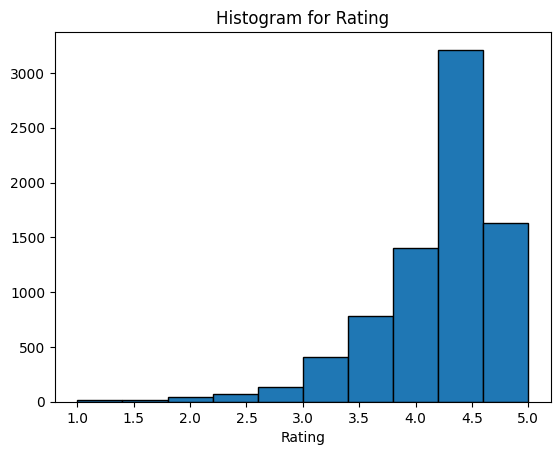

In [218]:
df.hist(column='Rating',grid=False,ec='black')
plt.title('Histogram for Rating',color='black')
plt.xlabel("Rating")

# More rating are distributed in 4 to 5 
# majority of the rating towards higher end .

Histogram for Size

Text(0.5, 0, 'Size')

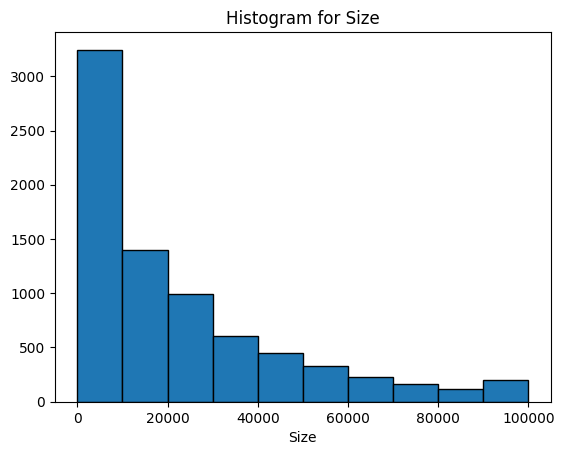

In [219]:
#Histogram for Size
df.hist(column='Size',grid=False,ec='black')
plt.title('Histogram for Size',color='black')
plt.xlabel("Size")
# Most of the apps having size below  40,000kb
# less than 1000 apps seems having outliers because it's size more than 80,000kb

Outlier treatment: 
      

In [220]:
df=df[(df['Price']<200)]

Text(0.5, 1.0, 'Boxplot for Price')

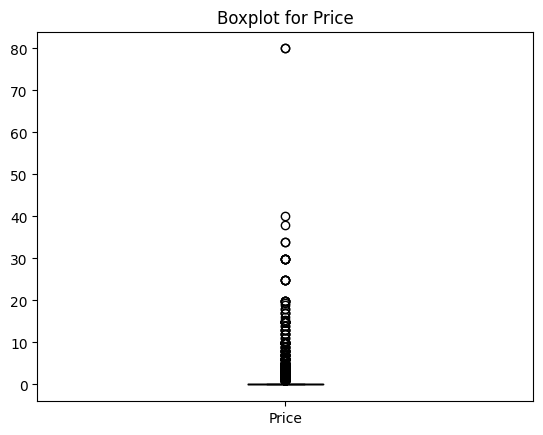

In [221]:
df.boxplot(column=['Price'],grid=False,color='black')
plt.title('Boxplot for Price',color='black')
# More than $200 price junk apps are droped. 

In [222]:
df=df[df['Reviews']<2000000]

Text(0.5, 1.0, 'Boxplot for Reviews')

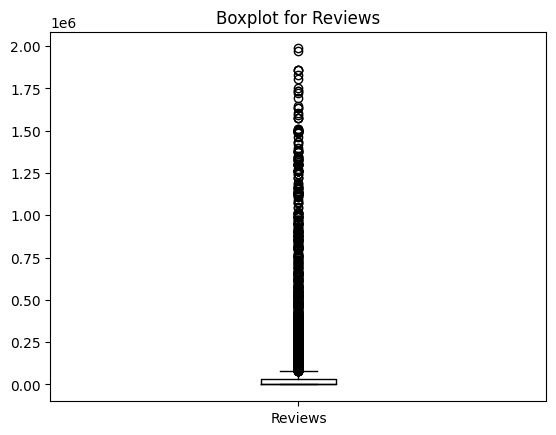

In [223]:
df.boxplot(column=['Reviews'],grid=False,color='black')
plt.title('Boxplot for Reviews',color='black')
#the apps which having more than 2 million reviews are dropped from the dataframe.

Text(0.5, 1.0, 'Boxplot for Installs')

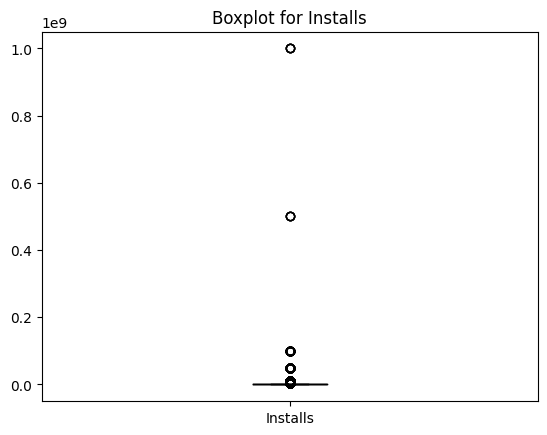

In [224]:
df.boxplot(column=['Installs'],grid=False,color='black')
plt.title('Boxplot for Installs',color='black')
# By using the box we can find out 25,50,75 percentiles accordingly.
# Installs have outliers. fixed 200 million as a cutoff then droping the values more than that.

In [225]:
df=df[df['Installs']<200000000]

Text(0.5, 1.0, 'Boxplot for Installs')

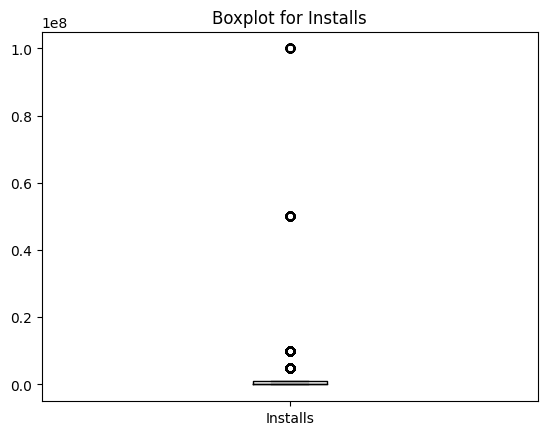

In [226]:
df.boxplot(column=['Installs'],grid=False,color='black')
plt.title('Boxplot for Installs',color='black')

Make scatter plot/joinplot for Rating vs. Price

/tmp/ipykernel_72/2785749953.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.126733,0.065521,0.063674,0.023989
Reviews,0.126733,1.000000,0.239279,0.743692,-0.050787
Size,0.065521,0.239279,1.000000,0.145828,0.004228
Installs,0.063674,0.743692,0.145828,1.000000,-0.046844
Price,0.023989,-0.050787,0.004228,-0.046844,1.000000


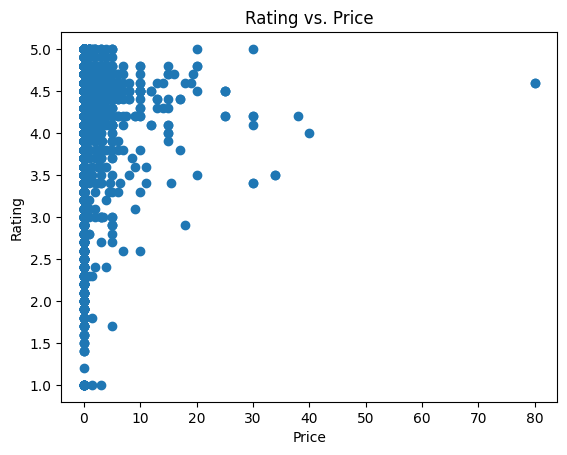

In [227]:
plt.scatter (df.Price, df.Rating)
plt.title('Rating vs. Price')
plt.xlabel('Price')
plt.ylabel('Rating')
df.corr()
# Rating is not depends on the Price. Free apps also makes good ratings.

Make scatter plot/joinplot for Rating vs. Size

Text(0, 0.5, 'Size')

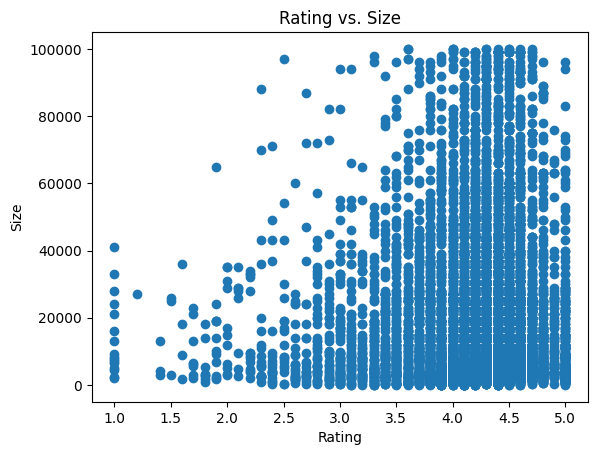

In [228]:
plt.scatter (df.Rating, df.Size)
plt.title('Rating vs. Size')
plt.xlabel('Rating')
plt.ylabel('Size')
# The app which has less size have good reviews

Make scatter plot/joinplot for Rating vs. Reviews

Text(0, 0.5, 'Reviews')

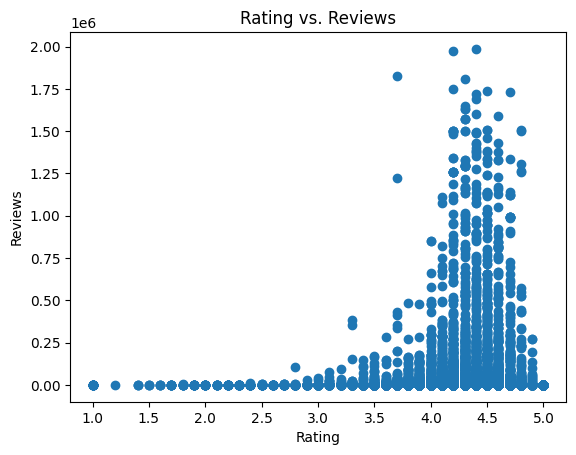

In [229]:
plt.scatter (df.Rating, df.Reviews)
plt.title('Rating vs. Reviews')
plt.xlabel('Rating')
plt.ylabel('Reviews')
# yes. More reviews has better ratings.

Make boxplot for Rating vs. Content Rating

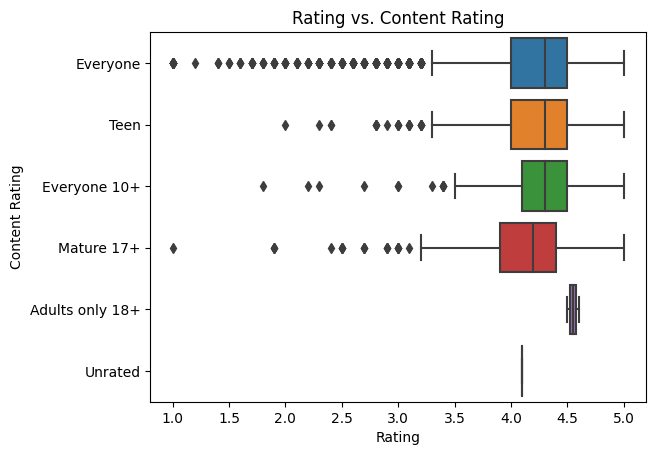

In [230]:
import seaborn as sns
#plt.figure(figsize=(10,6))
sns.boxplot(x='Rating',y='Content Rating',data=df)
plt.title('Rating vs. Content Rating')
plt.xlabel('Rating')
plt.ylabel('Content Rating')
plt.show()
# Everyone and teen app have high ratings

Make boxplot for Ratings vs. Category

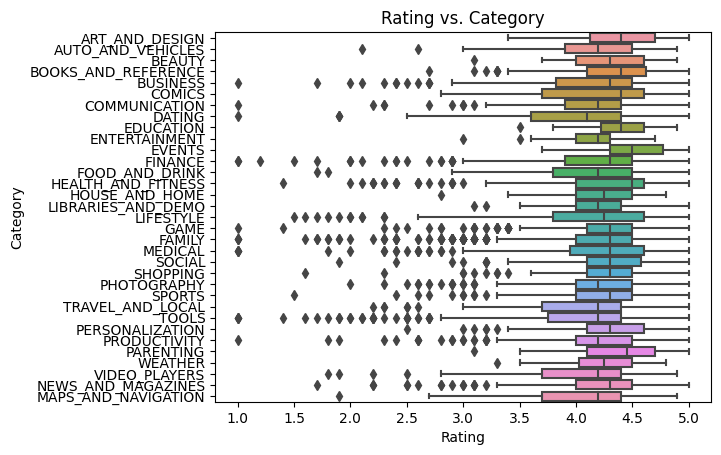

In [231]:
import seaborn as sns
#plt.figure(figsize=(10,6))
sns.boxplot(x='Rating',y='Category',data=df)
plt.title('Rating vs. Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()
# Events and Parents category apps have higher ratings

 Apply log transformation (np.log1p) to Reviews and Installs.

In [232]:
import numpy as np
inp1=df.copy()

In [233]:
inp1['Reviews_log']=np.log1p(inp1['Reviews'])
inp1['Installs_log']=np.log1p(inp1['Installs'])

In [234]:
inp1.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Reviews_log,Installs_log
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,5.075174,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,6.875232,13.122365
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,11.379520,15.424949
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,12.281389,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,6.875232,11.512935


Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [235]:
inp1=inp1.drop(['App','Last Updated','Current Ver','Android Ver'], axis=1)

In [236]:
inp1.head(5)

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Reviews_log,Installs_log
0,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,5.075174,9.210440
1,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,6.875232,13.122365
2,ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,11.379520,15.424949
3,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,12.281389,17.727534
4,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,6.875232,11.512935


Dummy encoding

In [237]:
inp2=pd.get_dummies(inp1,columns=['Category','Genres','Content Rating','Type'])
                    

In [238]:
inp2.head(5)

,Rating,Reviews,Size,Installs,Price,Reviews_log,Installs_log,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Type_Free,Type_Paid
0,4.1,159,19000.0,10000,0.0,5.075174,9.210440,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,3.9,967,14000.0,500000,0.0,6.875232,13.122365,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,4.7,87510,8700.0,5000000,0.0,11.379520,15.424949,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,4.5,215644,25000.0,50000000,0.0,12.281389,17.727534,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,4.3,967,2800.0,100000,0.0,6.875232,11.512935,1,0,0,...,0,0,0,1,0,0,0,0,1,0


Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

In [239]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = inp2.drop(columns=['Rating']) 
y = inp2['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [240]:
len(X_train)

5232

In [241]:
len(y_train)

5232

In [242]:
len(X_test)

2243

In [243]:
len(y_test)

2243

In [244]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)


array([4.49239036, 4.40171271, 4.16211118, ..., 4.02509762, 3.89812769,
       4.26316627])

In [245]:
y_test

1983    4.7
844     4.4
7954    4.3
6384    4.4
7374    4.3
       ... 
5184    3.9
9407    3.4
5446    4.0
6125    4.2
5193    4.2
Name: Rating, Length: 2243, dtype: float64

In [246]:
model.score(X_test,y_test)

0.15327696663541202

In [247]:
# R2 value on Training set
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print(f'R2 on the train set: {r2_train}')

R2 on the train set: 0.1481598805450356


In [248]:
# R2 value on Test set
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f'R2 on the test set: {r2_test}')

R2 on the test set: 0.15327696663541202


In [ ]:
#       THANK YOU     #  